In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
%matplotlib inline

pd.set_option("max_rows",100)

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Filepath to read Crash Data shapefile
filepath_crash_data = "NYC Crash Data - Cashmapper/cartodb-query.shp"
filepath_nyc_boundaries = "Borough Boundaries/geo_export_df017658-06e6-4fbf-8be1-4070c446823f.shp"

In [3]:
Crash_data_gdf = gpd.read_file(filepath_crash_data)
NYC_gdf = gpd.read_file(filepath_nyc_boundaries)

In [4]:
Crash_data_gdf.shape

(38877, 21)

In [5]:
Crash_data_gdf.head()

,cartodb_id,socrata_id,on_street_,cross_stre,date_time,latitude,longitude,borough,zip_code,crash_coun,...,number_o_1,number_o_2,number_o_3,number_o_4,number_o_5,number_o_6,number_o_7,contributi,vehicle_ty,geometry
0,2043328,3656795.0,None,79 WEST DRIVE,2017-04-24,NaN,NaN,None,None,1,...,0,0,0,0,0,1,0,Driver Inattention/Distraction,BICYCLE,None
1,2509642,4124171.0,AVENUE A,None,2019-04-29,40.727844,-73.98223,Manhattan,10009,1,...,0,0,0,0,0,1,0,Alcohol Involvement,Bike,POINT (-73.98223 40.72784)
2,2413283,4069947.0,6 AVENUE,None,2019-01-27,40.669846,-73.98244,Brooklyn,11215,1,...,0,0,0,0,0,1,0,Unspecified,Bike,POINT (-73.98244 40.66985)
3,2083437,3703671.0,61 STREET,None,2017-07-02,40.741280,-73.90257,Queens,None,1,...,0,0,0,0,0,1,0,"Driver Inattention/Distraction,Driver Inattent...","PASSENGER VEHICLE,BICYCLE",POINT (-73.90257 40.74128)
4,2449473,4026726.0,WEST 111 STREET,None,2018-11-11,40.801230,-73.95770,Manhattan,10026,1,...,0,0,0,0,0,1,0,"Unspecified,Unspecified","Sedan,Bike",POINT (-73.95770 40.80123)


In [6]:
Crash_data_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38877 entries, 0 to 38876
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cartodb_id  38877 non-null  int64   
 1   socrata_id  38877 non-null  float64 
 2   on_street_  33122 non-null  object  
 3   cross_stre  19909 non-null  object  
 4   date_time   38877 non-null  object  
 5   latitude    36346 non-null  float64 
 6   longitude   36346 non-null  float64 
 7   borough     37245 non-null  object  
 8   zip_code    30307 non-null  object  
 9   crash_coun  38877 non-null  int64   
 10  number_of_  38877 non-null  int64   
 11  number_o_1  38877 non-null  int64   
 12  number_o_2  38877 non-null  int64   
 13  number_o_3  38877 non-null  int64   
 14  number_o_4  38877 non-null  int64   
 15  number_o_5  38877 non-null  int64   
 16  number_o_6  38877 non-null  int64   
 17  number_o_7  38877 non-null  int64   
 18  contributi  38823 non-null  object  
 

# Selecting Manhatten Crashes only

In [7]:
Crash_data_Manhatten_gdf = Crash_data_gdf[Crash_data_gdf['borough'] == 'Manhattan']

In [8]:
Crash_data_Manhatten_gdf.shape

(10962, 21)

# Selecting only BICYCLE Accidents

In [9]:
Crash_data_Manhatten_gdf.vehicle_ty.value_counts()

PASSENGER VEHICLE,BICYCLE                             2301
Sedan,Bike                                            1225
TAXI,BICYCLE                                          1164
Station Wagon/Sport Utility Vehicle,Bike               914
SPORT UTILITY / STATION WAGON,BICYCLE                  813
                                                      ... 
Bike,Taxi,Box Truck                                      1
Convertible,Bike,Convertible,Sedan,Sedan                 1
DS,BICYCLE                                               1
Bike,Station Wagon/Sport Utility Vehicle,Box Truck       1
Flat Rack,Bike                                           1
Name: vehicle_ty, Length: 274, dtype: int64

In [10]:
Crash_data_Manhatten_BiCycles_gdf = Crash_data_Manhatten_gdf[Crash_data_Manhatten_gdf['vehicle_ty'].str.contains('BICYCLE')]

In [11]:
Crash_data_Manhatten_BiCycles_gdf.shape

(6603, 21)

## Sanity Check - Visualization

<AxesSubplot:>

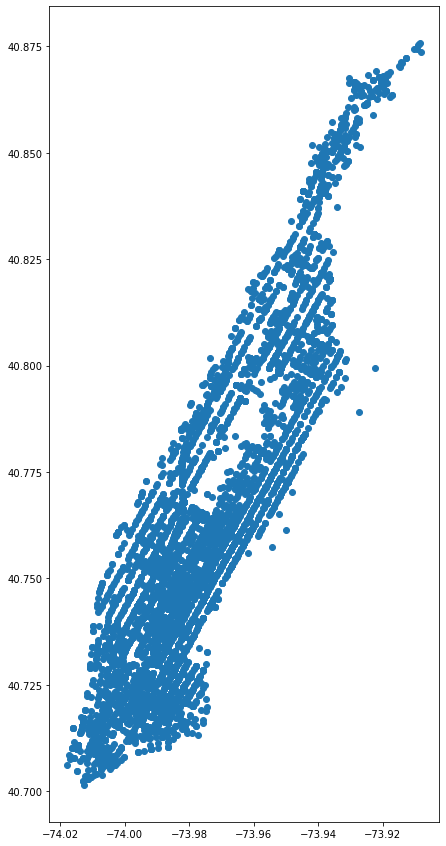

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
Crash_data_Manhatten_BiCycles_gdf.plot(ax=ax)

### Converting date_time column to Day , Month , Year Columns

In [13]:
#convert to datetime type
Crash_data_Manhatten_BiCycles_gdf['date_time'] = pd.to_datetime(Crash_data_Manhatten_BiCycles_gdf['date_time']).dt.date

#Split columns
Crash_data_Manhatten_BiCycles_gdf['day'] = pd.to_datetime(Crash_data_Manhatten_BiCycles_gdf['date_time']).dt.day
Crash_data_Manhatten_BiCycles_gdf['month'] = pd.to_datetime(Crash_data_Manhatten_BiCycles_gdf['date_time']).dt.month
Crash_data_Manhatten_BiCycles_gdf['year'] = pd.to_datetime(Crash_data_Manhatten_BiCycles_gdf['date_time']).dt.year


/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [14]:
#sanity check
Crash_data_Manhatten_BiCycles_gdf.columns

Index(['cartodb_id', 'socrata_id', 'on_street_', 'cross_stre', 'date_time',
       'latitude', 'longitude', 'borough', 'zip_code', 'crash_coun',
       'number_of_', 'number_o_1', 'number_o_2', 'number_o_3', 'number_o_4',
       'number_o_5', 'number_o_6', 'number_o_7', 'contributi', 'vehicle_ty',
       'geometry', 'day', 'month', 'year'],
      dtype='object')

In [15]:
Crash_data_Manhatten_BiCycles_gdf.year.value_counts()

2017    1354
2016    1313
2015    1183
2014    1179
2013    1164
2018     410
Name: year, dtype: int64

In [16]:
Crash_data_Manhatten_BiCycles_gdf.head()

,cartodb_id,socrata_id,on_street_,cross_stre,date_time,latitude,longitude,borough,zip_code,crash_coun,...,number_o_4,number_o_5,number_o_6,number_o_7,contributi,vehicle_ty,geometry,day,month,year
7,974858,79679.0,EAST 166 STREET,3 AVENUE,2013-05-13,NaN,NaN,Manhattan,None,1,...,0,0,1,0,"Unspecified,Unspecified","UNKNOWN,BICYCLE",None,13,5,2013
12,1826691,3448652.0,SAINT NICHOLAS AVENUE,WEST 118 STREET,2016-04-22,40.805028,-73.952760,Manhattan,10026,1,...,0,0,1,0,"Unspecified,Unspecified","PASSENGER VEHICLE,BICYCLE",POINT (-73.95276 40.80503),22,4,2016
17,975484,192749.0,WASHINGTON AVENUE,PARK AVENUE,2013-05-22,NaN,NaN,Manhattan,None,1,...,0,0,1,0,"Unspecified,Unspecified","SPORT UTILITY / STATION WAGON,BICYCLE",None,22,5,2013
35,1124345,3260394.0,WEST 64 STREET,WEST END AVENUE,2015-07-19,40.774735,-73.988176,Manhattan,10023,1,...,0,0,1,0,"Unspecified,Unspecified","PASSENGER VEHICLE,BICYCLE",POINT (-73.98818 40.77474),19,7,2015
48,2114631,3735348.0,WEST 123 STREET,None,2017-08-19,40.808860,-73.952130,Manhattan,10027,1,...,0,0,1,0,"Driver Inattention/Distraction,Unspecified","PASSENGER VEHICLE,BICYCLE",POINT (-73.95213 40.80886),19,8,2017


# Dropping rows with 'None' Geometry

In [17]:
Crash_data_Manhatten_BiCycles_gdf.drop(Crash_data_Manhatten_BiCycles_gdf[Crash_data_Manhatten_BiCycles_gdf.geometry == None].index , inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
Crash_data_Manhatten_BiCycles_gdf.shape

(6479, 24)

# FINAL NYC BICYCLE CRASH DATA - MANHATTAN ONLY

In [19]:
Crash_Data_final_gdf = Crash_data_Manhatten_BiCycles_gdf

---

# Bike Lanes

In [20]:
# Filepath to read Bike lanes shapefile
filepath_bike_lanes = "NYC Bike Lanes Routes Shapefiles/geo_export_080d6eb7-8dd8-49a3-89f8-c1fe1f89af1c.shp"
filepath_nyc_boundaries = "Borough Boundaries/geo_export_df017658-06e6-4fbf-8be1-4070c446823f.shp"

In [21]:
Bike_lanes_gdf = gpd.read_file(filepath_bike_lanes)
NYC_gdf = gpd.read_file(filepath_nyc_boundaries)

In [22]:
# Check Coordinate reference system
Bike_lanes_gdf.crs == NYC_gdf.crs

True

In [23]:
#Reduced Column List
Bike_lanes_Reduced_Column_List = ['boro','segmentid','shape_leng','geometry']

In [24]:
Bike_lanes_gdf = Bike_lanes_gdf[Bike_lanes_Reduced_Column_List]

# Reducing to manhatten only

In [25]:
Bike_lanes_gdf = Bike_lanes_gdf[Bike_lanes_gdf['boro']==1.0]

In [26]:
#NYC_gdf = NYC_gdf[NYC_gdf['boro_code']==1.0] #uncomment to plot only Manhatten

/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


Text(0.5, 1.0, 'Bike Lanes in NYC')

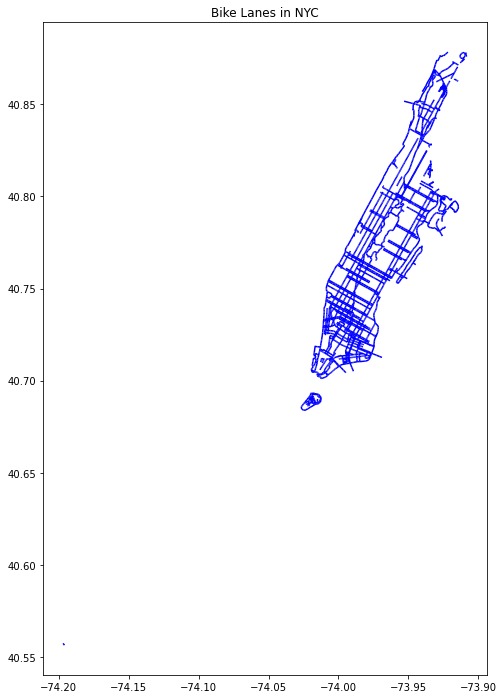

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
#NYC_gdf['geometry'].plot(axes=ax, color = 'lightgray')
Bike_lanes_gdf.plot(axes=ax , color='Blue', markersize=5)
plt.title('Bike Lanes in NYC')

# Final Bike Lanes Dataset for Manhatten

In [28]:
Bike_lanes_final_gdf = Bike_lanes_gdf

---

# Analyzing Crash Data and Bike Lanes

In [29]:
Crash_Data_final_gdf.crs == Bike_lanes_final_gdf.crs

True

/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:370: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


(40.67, 40.88)

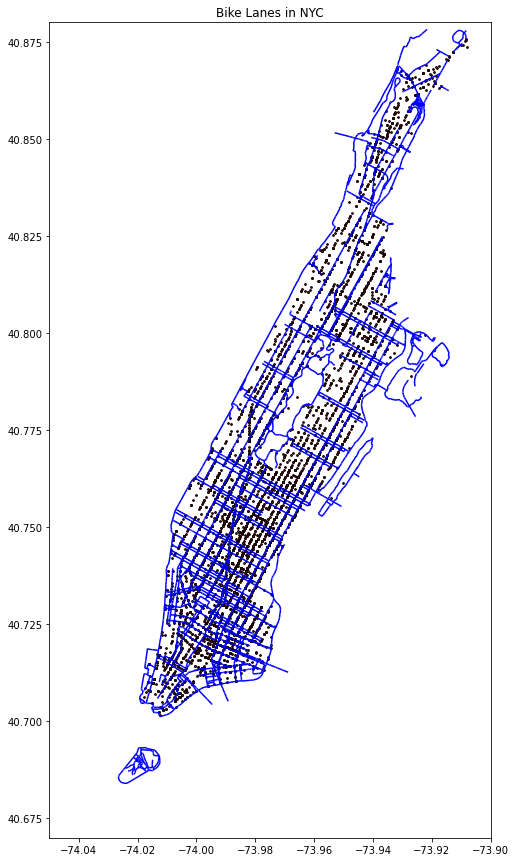

In [30]:


fig, ax = plt.subplots(1, 1, figsize=(20, 15))
#Crash Data
Crash_Data_final_gdf['geometry'].plot(axes=ax, 
    color='red', 
    edgecolor='black', 
    markersize = 3
    )

#Bike Lanes
Bike_lanes_gdf.plot(axes=ax , color='Blue', markersize=10)
plt.title('Bike Lanes in NYC')
plt.xlim([-74.05,-73.90])
plt.ylim([40.67,40.88])

In [31]:
#dist = Crash_Data_final_gdf.distance(Bike_lanes_final_gdf)
#dist.sort_values()


In [32]:
#!pip install pygeos

In [33]:
#!conda install pygeos

In [34]:
Crash_Data_final_gdf['geometry'] = Crash_Data_final_gdf.geometry.buffer(0.00001) #add buffer to point geom

<ipython-input-34-b961045722cf>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Crash_Data_final_gdf['geometry'] = Crash_Data_final_gdf.geometry.buffer(0.00001) #add buffer to point geom
/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot:>

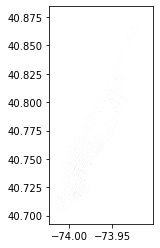

In [35]:
Crash_Data_final_gdf.plot()

In [36]:

join = gpd.sjoin(Bike_lanes_final_gdf, Crash_Data_final_gdf, how='inner',op='intersects')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [37]:
join.head()

,boro,segmentid,shape_leng,geometry,index_right,cartodb_id,socrata_id,on_street_,cross_stre,date_time,...,number_o_3,number_o_4,number_o_5,number_o_6,number_o_7,contributi,vehicle_ty,day,month,year
591,1.0,18147.0,198.410678,"LINESTRING (-74.01771 40.70797, -74.01740 40.7...",8416,895857,1006238.0,SOUTH END AVENUE,WEST THAMES STREET,2014-08-10,...,0,0,0,1,0,"Prescription Medication,Unspecified","PASSENGER VEHICLE,BICYCLE",10,8,2014
592,1.0,18149.0,250.361799,"LINESTRING (-74.01740 40.70846, -74.01696 40.7...",8416,895857,1006238.0,SOUTH END AVENUE,WEST THAMES STREET,2014-08-10,...,0,0,0,1,0,"Prescription Medication,Unspecified","PASSENGER VEHICLE,BICYCLE",10,8,2014
594,1.0,18154.0,291.618141,"LINESTRING (-74.01676 40.70933, -74.01638 40.7...",23611,1104582,3237786.0,ALBANY STREET,SOUTH END AVENUE,2015-06-11,...,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified","TAXI,BICYCLE",11,6,2015
13212,1.0,240712.0,336.556316,"LINESTRING (-74.01521 40.70983, -74.01638 40.7...",23611,1104582,3237786.0,ALBANY STREET,SOUTH END AVENUE,2015-06-11,...,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified","TAXI,BICYCLE",11,6,2015
18386,1.0,9009007.0,383.173556,"LINESTRING (-74.01638 40.71008, -74.01598 40.7...",23611,1104582,3237786.0,ALBANY STREET,SOUTH END AVENUE,2015-06-11,...,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified","TAXI,BICYCLE",11,6,2015


/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:370: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


(40.67, 40.88)

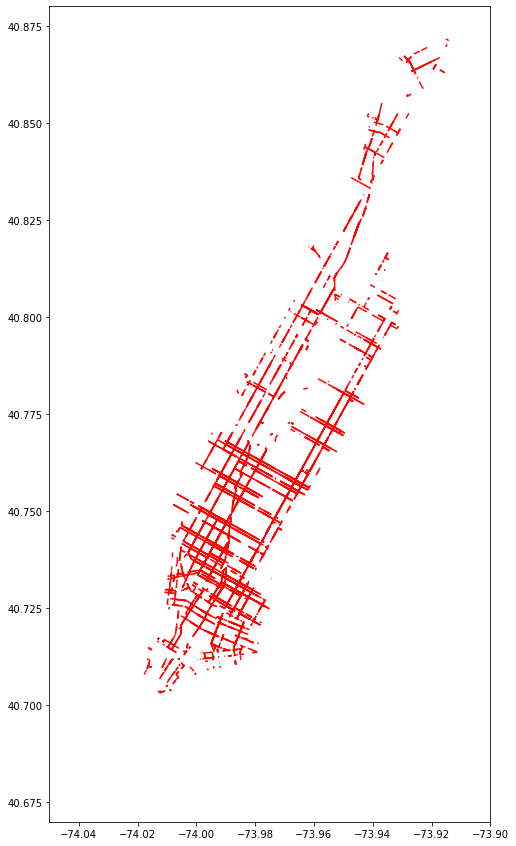

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
#Crash Data
join['geometry'].plot(axes=ax, 
    color='red', 
    edgecolor='black', 
    markersize = 3
    )

#Bike Lanes
#Bike_lanes_gdf.plot(axes=ax , color='Blue', markersize=10)
#plt.title('Bike Lanes in NYC')
plt.xlim([-74.05,-73.90])
plt.ylim([40.67,40.88])

# Notes:

Since the shape file are line strings, NYC crash data points geometry is considering the entire bikelane as dangerous as it intersects with the entire bikelane geometry(tested with buffer range (0.00001, 0.01))

---

# Attempting with Zipcode as an alternative

In [39]:
# Filepath to read zipcodes shapefile
filepath_zipcodes = "ZIP_CODE_040114/ZIP_CODE_040114.shp"

In [40]:
nyc_zipcodes_gdf = gpd.read_file(filepath_zipcodes)

In [41]:
nyc_zipcodes_gdf.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


<AxesSubplot:>

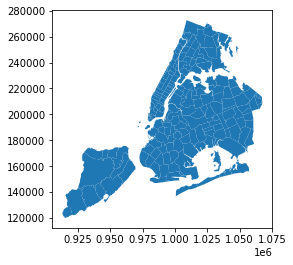

In [43]:
nyc_zipcodes_gdf.plot()